In [12]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [26]:
def synthetic_data(w,b,num_examples):
    """生成y=wx+b+噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)#加入均值为0，方差为0.01的与y同形状的噪音
    return X,y.reshape((-1,1))
true_w=torch.tensor([2,-3.4])#加权w
true_b=4.2#偏差
features,labels=synthetic_data(true_w,true_b,1000)


In [27]:
print ('features:',features[0],'\nlable',labels[0])

features: tensor([-0.8135,  0.5462]) 
lable tensor([0.7002])


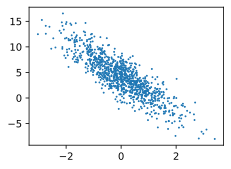

In [31]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1);

In [40]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]#返回特征向量和标签向量
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.0568, -0.5916],
        [ 0.3521,  0.1412],
        [-0.3476, -0.1589],
        [-1.1351, -0.8602],
        [-1.6459,  1.6314],
        [-0.8845, -0.1391],
        [-0.4827,  0.2837],
        [-1.2677,  2.8235],
        [-0.5549,  1.3116],
        [-0.1122,  1.1180]]) 
 tensor([[ 6.0975],
        [ 4.4137],
        [ 4.0419],
        [ 4.8367],
        [-4.6443],
        [ 2.8962],
        [ 2.2815],
        [-7.9283],
        [-1.3606],
        [ 0.1661]])


In [56]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)


In [42]:
def linear_regression(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [43]:
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [44]:
def sgd(params,lr,batch_size):#params:参数列表
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()
            

In [57]:
lr=0.03
num_epochs=3#扫描3遍
net=linear_regression#便于使用别的数据模型，此处选择线性回归
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)#此时损失l是一个形状为【batch,1]的张量        
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    
    with torch.no_grad():#评价梯度并使用参数的梯度更新梯度
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.000052
epoch2,loss0.000060
epoch3,loss0.000072


In [3]:
"""线性回归的简洁实现:通过使用深度学习框架来简介实现线性回归模型+生成数据集"""

'线性回归的简洁实现'

In [8]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=d2l.synthetic_data(true_w,true_b,100)

In [13]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)
batch_size=10
data_iter=load_array((features,labels),batch_size)
next(iter(data_iter))

[tensor([[ 0.4335, -0.0746],
         [-1.1803,  1.3881],
         [ 0.9480, -0.3352],
         [-1.4973, -0.5270],
         [ 1.3610, -0.9466],
         [-0.8757,  0.4190],
         [ 1.0042,  1.3668],
         [-1.7087, -0.5755],
         [ 0.6076,  0.3049],
         [-2.0015,  0.7384]]),
 tensor([[ 5.3294],
         [-2.8961],
         [ 7.2457],
         [ 2.9735],
         [10.1560],
         [ 1.0269],
         [ 1.5643],
         [ 2.7532],
         [ 4.3861],
         [-2.3134]])]

In [14]:
"""nn是神经网络的缩写"""
from torch import nn
net=nn.Sequential(nn.Linear(2,1))#输入维度、输出维度


In [15]:
'''初始化模型参数:权重、偏差'''
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [20]:
loss=nn.MSELoss()
trainer=torch.optim.SGD(net.parameters(),lr=0.003)

In [22]:
num_epochs=3
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch{epoch+1},loss{l:f}')

epoch1,loss0.770139
epoch2,loss0.696451
epoch3,loss0.629949
